In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
books = pd.read_csv("books.csv", error_bad_lines=False)

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


Five lines have ',' in a field and these are dropped from the datatset.

In [4]:
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [5]:
books.tail()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
13709,47699,M Is for Magic,Neil Gaiman-Teddy Kristiansen,3.82,0061186422,9780061186424,eng,260,11317,1060
13710,47700,Black Orchid,Neil Gaiman-Dave McKean,3.72,0930289552,9780930289553,eng,160,8710,361
13711,47701,InterWorld (InterWorld #1),Neil Gaiman-Michael Reaves,3.53,0061238961,9780061238963,en-US,239,14334,1485
13712,47708,The Faeries' Oracle,Brian Froud-Jessica Macbeth,4.43,0743201116,9780743201117,eng,224,1550,38
13713,47709,The World of The Dark Crystal,Brian Froud,4.29,1862056242,9781862056244,eng,132,3572,33


Since bookID, isbn & isbn13 are not significant for our analysis, we can safely drop them.

In [6]:
books.drop(columns=['bookID', 'isbn', 'isbn13'], inplace=True)

In [7]:
books.columns.tolist()

['title',
 'authors',
 'average_rating',
 'language_code',
 '# num_pages',
 'ratings_count',
 'text_reviews_count']

In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 7 columns):
title                 13714 non-null object
authors               13714 non-null object
average_rating        13714 non-null float64
language_code         13714 non-null object
# num_pages           13714 non-null int64
ratings_count         13714 non-null int64
text_reviews_count    13714 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 750.1+ KB


In [9]:
pd.options.display.float_format = "{:.2f}".format
books.describe() #include='all'

,average_rating,# num_pages,ratings_count,text_reviews_count
count,13714.00,13714.00,13714.00,13714.00
mean,3.93,342.40,17765.40,533.63
std,0.36,252.65,112957.23,2529.01
min,0.00,0.00,0.00,0.00
25%,3.77,196.00,83.00,7.00
50%,3.96,301.00,630.50,40.00
75%,4.13,421.00,4742.25,222.00
max,5.00,6576.00,5629932.00,93619.00


In [10]:
books['language_code'].unique()

array(['eng', 'en-US', 'spa', 'fre', 'en-GB', 'mul', 'ger', 'ara', 'por',
       'grc', 'en-CA', 'enm', 'jpn', 'dan', 'zho', 'nl', 'ita', 'lat',
       'srp', 'rus', 'tur', 'msa', 'swe', 'glg', 'cat', 'wel', 'heb',
       'nor', 'gla', 'ale'], dtype=object)

'eng', 'en-US', 'en-GB', 'en-CA', 'enm' could all be replaced with 'eng' to create a single language code for Engish language.

In [11]:
eng_codes=['eng', 'en-US', 'en-GB', 'en-CA', 'enm']
books.loc[books['language_code'].isin (eng_codes), 'language_code'] = 'eng'

how many books are from other languages?

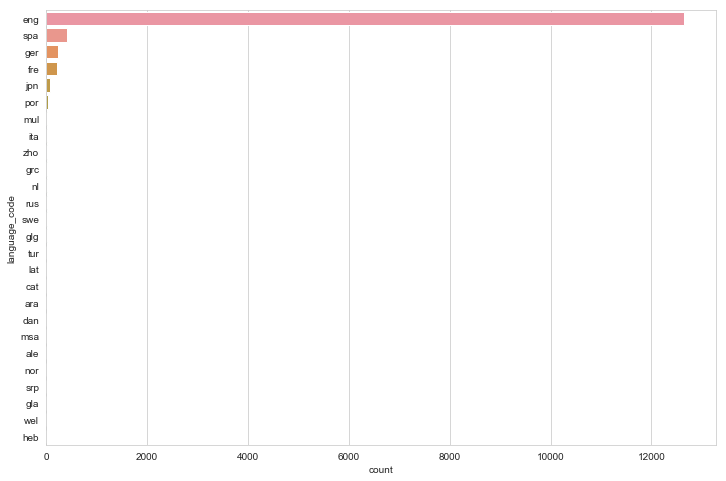

In [12]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(y='language_code', data=books,
             order=books['language_code'].value_counts().index)
plt.show()

We can hardly see other counts as huge # of books are in english and eng dominates our plot. Let us remove english from our data and see how it looks

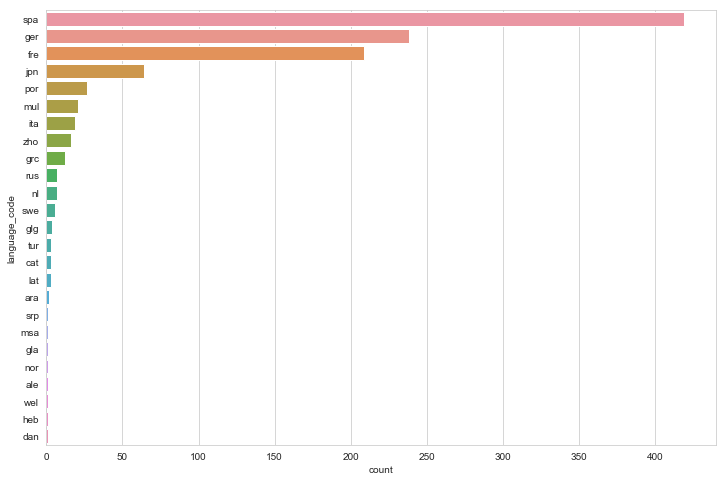

In [13]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
books_temp = books.loc[books['language_code'] != 'eng', :]
sns.countplot(y='language_code', data=books_temp, 
             order=books_temp['language_code'].value_counts().index)
plt.show()

After English, next hightest # of books are in Spain, German, French, Japan and so on.

Let us list out books with highest ratings counts

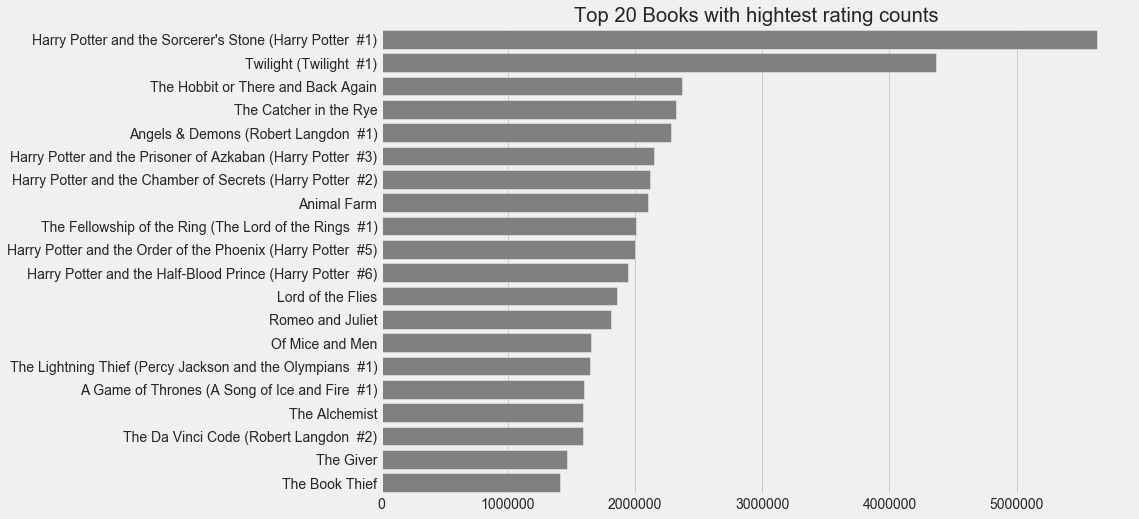

In [14]:
highest_ratingcount = books[['title', 'ratings_count']].sort_values('ratings_count', ascending = False).head(20)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.barplot('ratings_count', 'title', data=highest_ratingcount, color='gray')
plt.title("Top 20 Books with hightest rating counts")
plt.xlabel("")
plt.ylabel("")
plt.show()

Harry potter and Twilight part 1 have been rated the hightest # of times.

Who are the authors with hightest number of books in their kitty? Let's find out.

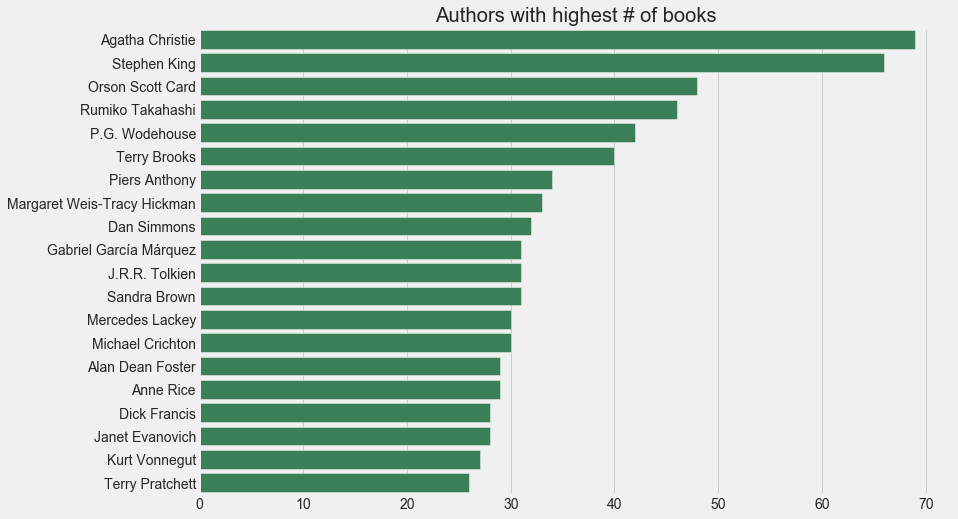

In [15]:
plt.figure(figsize=(12,8))
authors_highestbooks = books['authors'].value_counts().head(20)
plt.style.use('fivethirtyeight')
sns.barplot(authors_highestbooks.values, authors_highestbooks.index, color='seagreen')
plt.title("Authors with highest # of books")
plt.show()

In our basics summary statistics, we saw that the maximum value for # num_pages variable is 6576! There are books with these many pages! Let us find out a list of books with # num_pages more than 2500.

In [16]:
# books with more than 2500 pages
books[books['# num_pages'] >= 2500][['title', 'authors', 'average_rating', '# num_pages']]

,title,authors,average_rating,# num_pages
5,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling-Mary GrandPré,4.78,2690
7,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,3342
6264,In Search of Lost Time (6 Volumes),Marcel Proust-C.K. Scott Moncrieff-Andreas May...,4.34,4211
6376,The Complete Works: The Revised Oxford Transla...,Aristotle-Jonathan Barnes,4.43,2512
7821,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.70,6576
8179,The Second World War,Winston S. Churchill-John Keegan,4.44,4736
8201,Summa Theologica 5 Vols,Thomas Aquinas,4.10,3020
9378,Harrison's Principles of Internal Medicine,Dennis L. Kasper-Dan L. Longo-Stephen L. Hause...,4.34,2751
12860,The Civil War: A Narrative,Shelby Foote,4.53,2934
12862,Civil War: a Narrative,Shelby Foote,4.53,2965


In [17]:
rating_5 = books[books['average_rating']==5]
total_rating_5 = len(rating_5)
percent = np.round(len(rating_5)/books.shape[0], 3) * 100
print(f"There are {total_rating_5} books with rating 5. It's approx {percent}% of overall books.")
print("Let us find out how many of these are from eng language alone.")

There are 28 books with rating 5. It's approx 0.2% of overall books.
Let us find out how many of these are from eng language alone.


In [18]:
rating_5['language_code'].value_counts()

eng    24
wel     1
spa     1
grc     1
fre     1
Name: language_code, dtype: int64

In [19]:
rating_5['authors'].value_counts()

NOT A BOOK                                                                                                  3
Bill Watterson                                                                                              1
Nicholas    Evans-Rhonda  Evans                                                                             1
Ross Garnaut                                                                                                1
Jean-Paul Gabilliet-François Gallix-Janice Fiamengo-Raphaelle Costa de Beauregard-Priscilla Morin-Ollier    1
Frederick P. Lenz                                                                                           1
Middlesex Borough Heritage Committee                                                                        1
Svetlana Alpers                                                                                             1
Aaron Rosenberg-Christopher Cook                                                                            1
Ian       

In [20]:
books[books['authors']=='NOT A BOOK']
# this does not look right, there are only 2 pages in each of these pages?

,title,authors,average_rating,language_code,# num_pages,ratings_count,text_reviews_count
6596,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,5.00,eng,2,3,0
6597,The Goon Show: Moriarty Where Are You?,NOT A BOOK,4.50,eng,2,0,0
6598,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,5.00,eng,2,2,0
6745,The Goon Show Volume 5: And There's More Wher...,NOT A BOOK,5.00,eng,2,0,0


In [21]:
# how many books by J.K. rowling (including co-authored) with rating 4.5 or above
books[(books['authors'].str.contains("J.K. Rowling")) & (books['average_rating'] >=4.5)]

,title,authors,average_rating,language_code,# num_pages,ratings_count,text_reviews_count
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,eng,652,1944099,26249
4,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,eng,435,2149872,33964
5,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling-Mary GrandPré,4.78,eng,2690,38872,154
7,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,eng,3342,27410,820
695,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.56,eng,768,1173,72
1429,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.55,eng,480,3116,147
2028,混血王子的背叛 (哈利波特 #6),J.K. Rowling-J.K.羅琳-皇冠編譯組-張定綺-彭倩文-趙丕慧-林靜華,4.56,zho,735,69,0
2029,火盃的考驗 (哈利波特 #4),J.K. Rowling-J.K.羅琳-彭倩文,4.55,zho,768,82,1
5294,Harry Potter y el misterio del príncipe (Harry...,J.K. Rowling-Gemma Rovira Ortega,4.56,spa,602,4572,338
12254,Harry Potter und der Gefangene von Askaban (Ha...,J.K. Rowling-Rufus Beck,4.55,ger,13,308,8


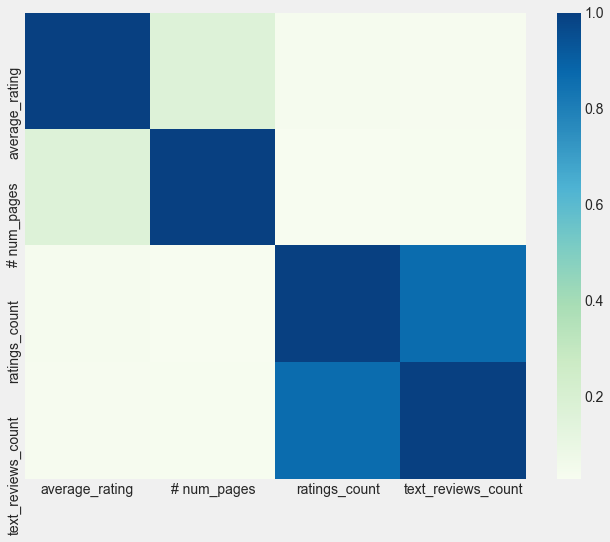

In [22]:
# correlation
corr = books.corr()
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
sns.heatmap(corr, cmap='GnBu')
plt.show()
# strong correlation between ratings_count & text_reviews_count which makes sense.

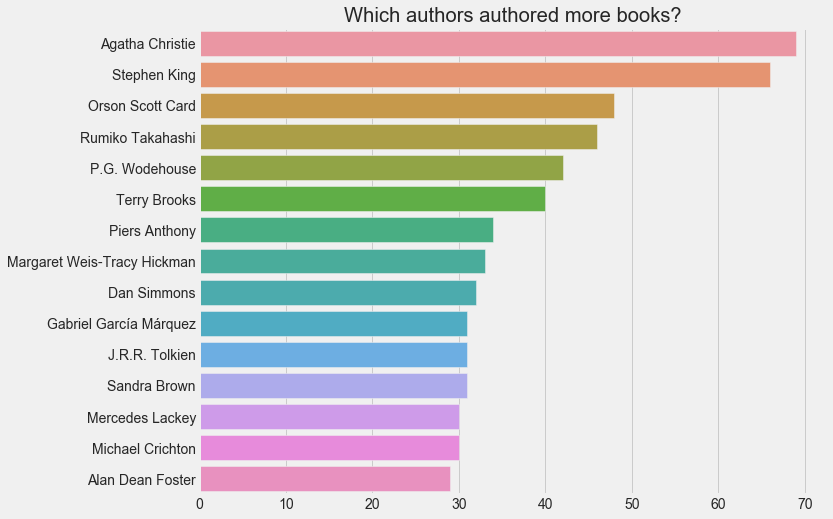

In [23]:
# which authors wrote maximum books (top 15)?
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
authors_top10 = books['authors'].value_counts().index[0:15]
sns.countplot(y='authors', data=books, order=authors_top10)
plt.title("Which authors authored more books?")
plt.ylabel("")
plt.xlabel("")
plt.show()

In [24]:
books['title_length'] = books['title'].str.len()
# books.sort_values(by='title_length',ascending=False, inplace=False).iloc[0:10,]

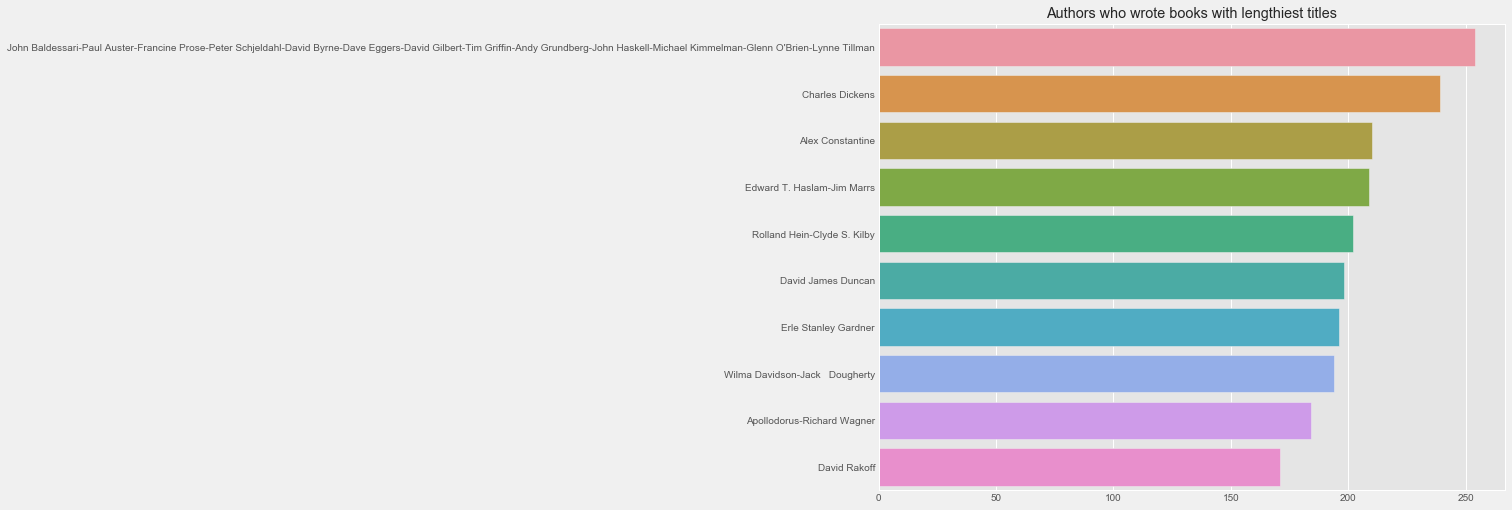

In [25]:
# which authors have the lengthiest titles of their books?
plt.figure(figsize=(10,8))
plt.style.use('ggplot')
length_indices = books[['title_length']].sort_values(by='title_length',ascending=False).index
sns.barplot(x='title_length', y='authors', data=books.sort_values(by='title_length',ascending=False, inplace=False).iloc[0:10,])
plt.title("Authors who wrote books with lengthiest titles")
plt.ylabel("")
plt.xlabel("")
plt.show()

In [26]:
### text analysis on title columns
### what words are most used in making the title?
# change to lower case
# books['title'] = books['title'].apply(lambda x: x.lower())

# # tokenize words
# tokenized_title = books['title'].apply(word_tokenize)

# # loading english stopwords dict
# stop_words = set(stopwords.words('english'))

# # function to remove stopwords
# def remove_stopwords(words):
#     clean_word = []
#     for word in words:
#         if word not in stop_words:
#             clean_word.append(word)
#     return clean_word

# # remove stop words from tokenized_title
# clean_title = tokenized_title.apply(remove_stopwords)

# print few records
# print(tokenized_title[0:10])
# print(clean_title[0:10])

# remove punctuations
